# DSCI 100: Personal Planning Stage for Group Project

In [1]:
# imports
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data Description: players.csv
- Number of observations: 196
- Summary Statistics:
    - played_hours:
        - Min: 0.00
        - Median: 0.10
        - Mean: 5.85
        - Max: 223.10
    - Age:
        - Min: 9.00
        - Median: 19.00
        - Mean: 21.14
        - Max: 58.00
    - subscribe:
        - FALSE: 52
        - TRUE: 144
- Number of variables: 7
    - experience: Categorical/Ordinal
        - How much experience a player has playing Minecraft
    - subscribe: Categorical/Binary 
        - Whether or not a player is subscribed to a game-related newsletter
    - hashedEmail: Categorical
        - A player's email, hashed/encrypted for privacy
    - played_hours: Numerical
        - How many hours a player played on the PlaiCraft server
    - name: Categorical
        - A player's name
    - gender: Categorical
        - A player's gender
    - Age: Numerical
        - The age of a player
- Issues in the data:
    - Age variable contains 2 NAs, will require imputation
    - Imbalanced, and a poor spread of data (e.g. a lot of players have played_hours = 0)
    - Very small sample size, so results may be skewed
- Irrelevant variables:
    - name
    - hashedEmail
    - gender
    - subscribe

In [2]:
player_data <- read_csv("https://raw.githubusercontent.com/Andrewhli06/dsci100-project/refs/heads/main/players.csv")
summary(player_data)
head(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Data Description: sessions.csv
- Number of observations: 1535
- Summary Statistics:
    - original_start_time:
        - Min: 1.712e+12
        - Median: 1.719e+12
        - Mean: 1.719e+12
        - Max: 1.727e+12
    - original_end_time:
        - Min: 1.712e+12
        - Median: 1.719e+12
        - Mean: 1.719e+12
        - Max: 1.727e+12
- Number of variables: 5
    - hashedEmail: Categorical
        - A player's email
    - start_time: Categorical/Ordinal
        - The start time of a player's session
    - end_time: Categorical/Ordinal
        - The end time of a player's session
    - original_start_time: Numerical
        - The numerical representation of start_time
    - original_end_time: Numerical
        - The numerical representation of end_time
- Issues in the data:
    - original_end_time has 2 NAs, will require imputation
    - Very dense cluster of points (median = mean), and the start_time ~ end_time (due to scale, and rounding)
        - This would likely need lots of processing for knn purposes
    - Data is not tidy (start_time/end_time should not be measuring dd/mm/yyyy and time all in one cell)
- Irrelevant variables:
    - hashedEmail

In [3]:
session_data <- read_csv("https://raw.githubusercontent.com/Andrewhli06/dsci100-project/refs/heads/main/sessions.csv")
summary(session_data)
head(session_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## Questions: Will be using players.csv exclusively
- Broad: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
- Specific: To what extent does player experience predict played_hours, and does that vary with age?
- How the data will help address this question:
    - We can look at the effects of using only age or experience as a predictor for played_hours, then look at how that differs from using both as predictors simultaneously. Intuitively speaking, the more experience you have, the less you need to play. The less experience you have, the more you need to play. And vice versa. Finally, age determines how much time you can dedicate to Minecraft.
- Data wrangling plans:
    - In terms of wrangling, players.csv looks tidy. All the players' information is contained within a row, each cell measures one thing, and each column represents one distinct variable. Thus, I believe that no wrangling will be required to apply predictive methods.

## EDA and Visualization:
- Loading dataset: See Data Description section
- Wrangling data: See Questions section
- Compute mean values for players.csv: See Data Description section
  
| Variable | Mean |
|----------|----------|
| played_hours | 5.85 |
| Age    | 21.14  |

- Insights gained from the plots below:
    - age_plot: vast majority of players between 15-30, and that range contains the most outliers
    - experience_plot: amateur and regular play the most on average, higher skill tends to play less
    - interaction_plot: just a combination of previous insights, no new insights

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


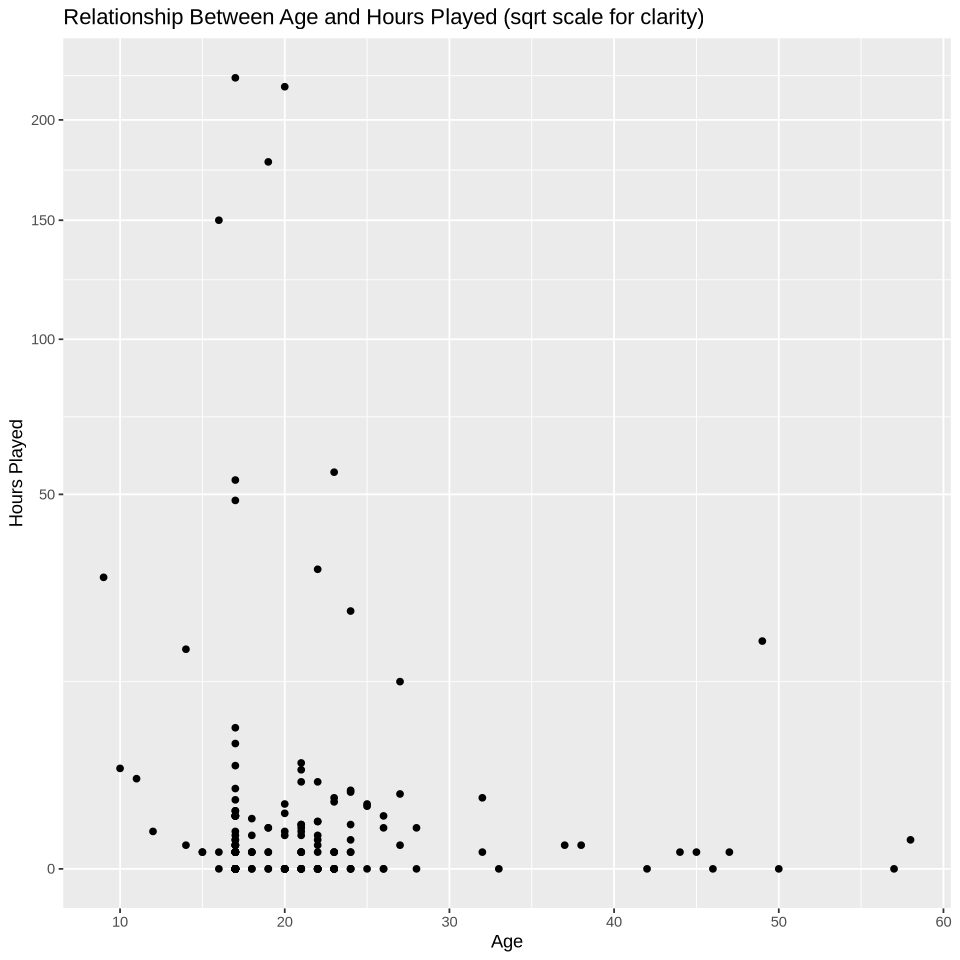

In [4]:
options(repr.plot.width = 8, repr.plot.height = 8)
# ignore the warning message, there are 2 NAs which will be imputed later
age_plot <- player_data |>
            ggplot(aes(x = Age, y = played_hours)) +
            geom_point() +
            scale_y_sqrt() + # using sqrt scale so that the small values are more visible
            labs(title = "Relationship Between Age and Hours Played (sqrt scale for clarity)",
                 x = "Age",
                 y = "Hours Played")
age_plot

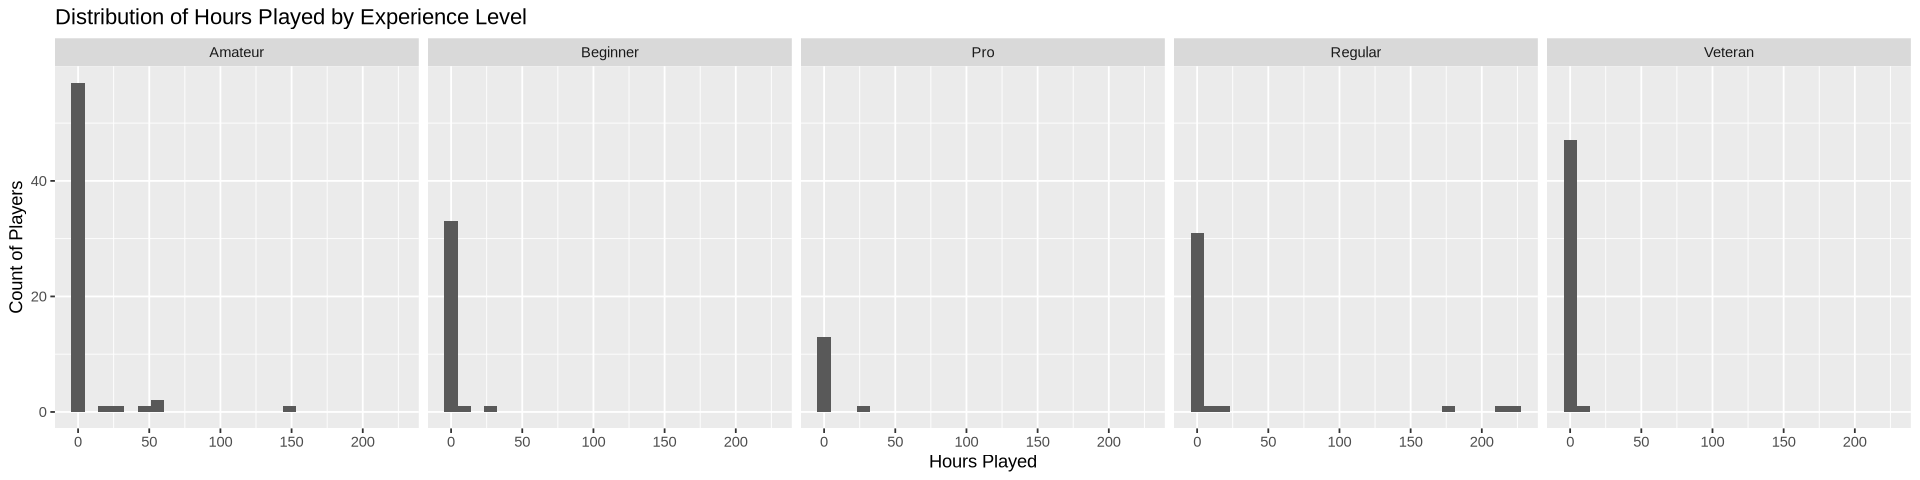

In [5]:
options(repr.plot.width = 16, repr.plot.height = 4)
exp_plot <- player_data |>
            ggplot(aes(x=played_hours)) + 
            geom_histogram(bins = 25) +
            facet_wrap(~ experience, nrow = 1) +
            labs(title = "Distribution of Hours Played by Experience Level",
                 x = "Hours Played",
                 y = "Count of Players")
exp_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


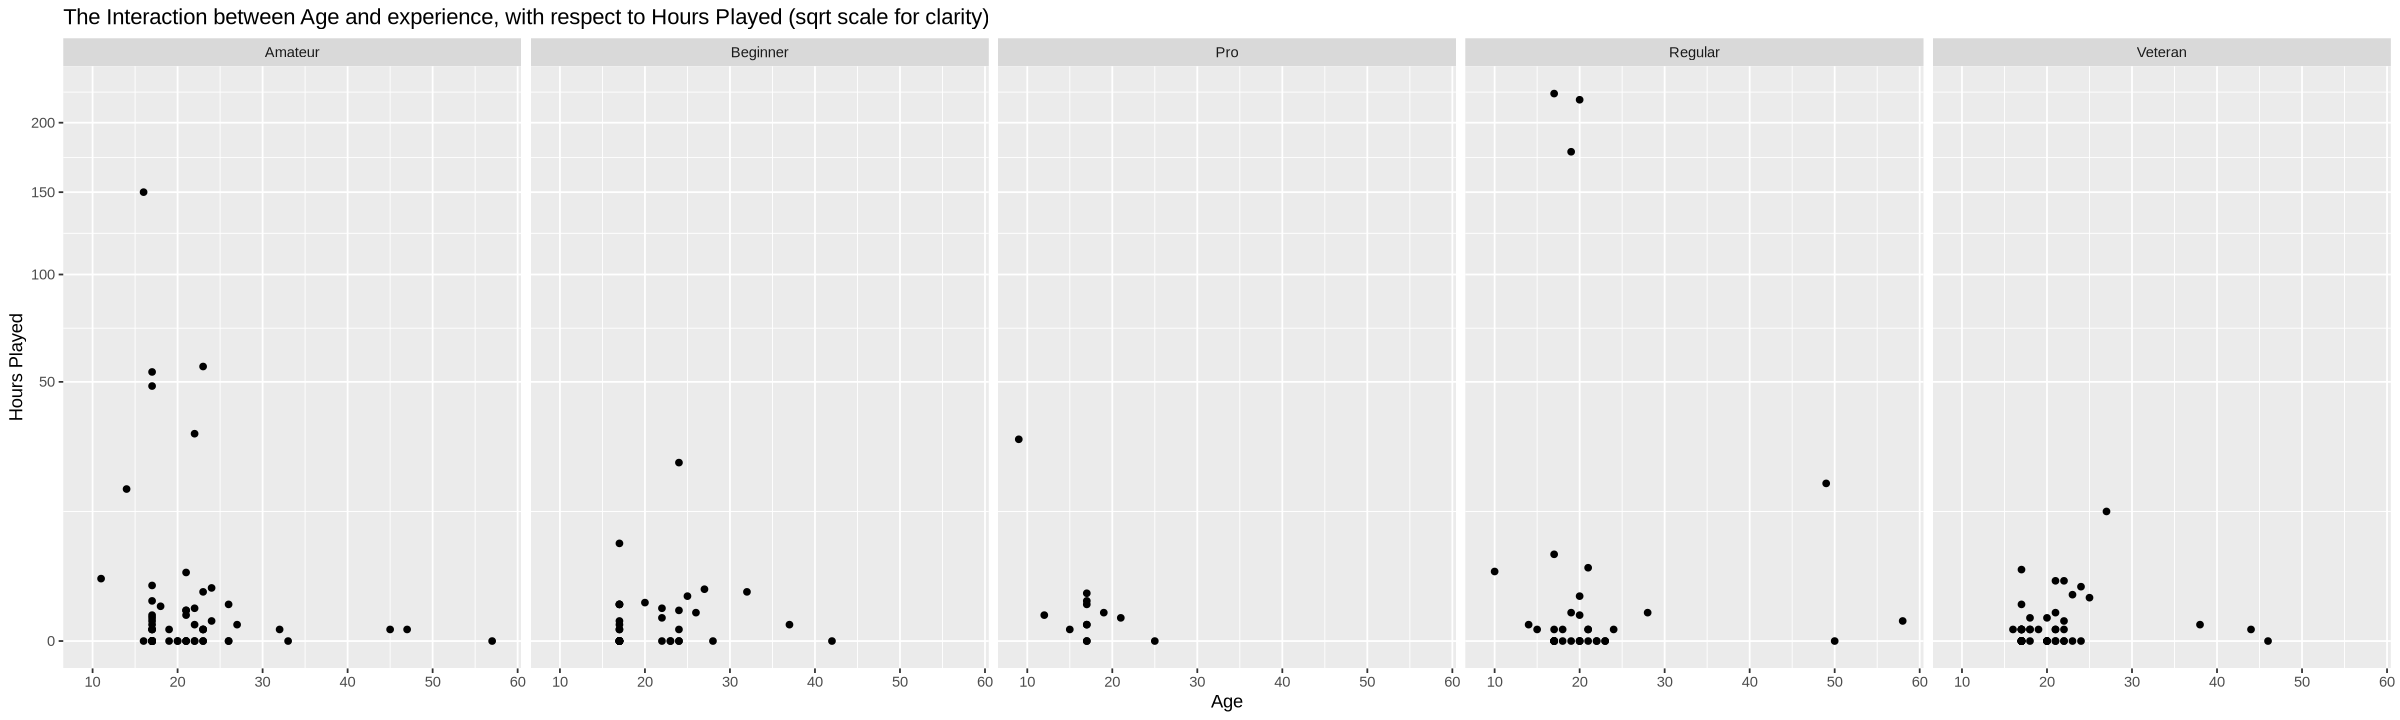

In [6]:
options(repr.plot.width = 20, repr.plot.height = 6)
interaction_plot <- player_data |>
                    ggplot(aes(x = Age, y = played_hours)) +
                    geom_point() +
                    scale_y_sqrt() + # using sqrt scale so that the small values are more visible
                    facet_wrap(~ experience, nrow = 1) +
                    labs(title = "The Interaction between Age and experience, with respect to Hours Played (sqrt scale for clarity)",
                         x = "Age",
                         y = "Hours Played")
interaction_plot

## Methods and Plan:
- The most appropriate method is regression, because played_hours is continuous. And I believe that since none of the plots above showed a clear linear relationship, knn regression would serve us better.
- Knn assumes the predictors will provide some way of calculating a distance metric, that the observations are are somewhat grouped together (to avoid noise), and that predictors are standardized.
- Potential limitations and weaknesses include:
    - Size of dataset (very small)
    - Large portion of observations are 0 played_hours, thus could lead to skewed results (poor training data, imbalanced)
    - Very small number of outliers and those outliers are quite extreme (predictions around the outliers could be quite noisy)
- Model selection: knn regression, see reason above
- Data processing: Scaling & imputation (Age), ordinal encoding (experience), likely use a standard 70/30 split (could vary slightly just due to the size of the dataset), cross validation will be used to tune k.